# Wczytywanie i przeglądanie

Breast Cancer Wisconsin (Diagnostic) Data Set - plik wdbc.data - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
import pandas as pd
import pandas_profiling

In [2]:
%matplotlib inline

In [3]:
nazwy_kolumn = ["klasa", "mean radius", "mean texture", "mean perimeter", "mean area","mean smoothness", 
                "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension", 
                "radius error", "texture error", "perimeter error", "area error", "smoothness error", 
                "compactness error", "concavity error", "concave points error", "symmetry error", 
                "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", 
                "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", 
                "worst fractal dimension"]

In [4]:
nowotwor = pd.read_csv("../input/wdbc.data", names = nazwy_kolumn)

In [5]:
nowotwor["klasa"] = nowotwor["klasa"].str.replace("B", "Ł")
nowotwor["klasa"] = nowotwor["klasa"].str.replace("M", "Z")

In [6]:
pandas_profiling.ProfileReport(nowotwor)

Number of variables,32
Number of observations,569
Total Missing (%),0.0%
Total size in memory,142.3 KiB
Average record size in memory,256.1 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,10


In [7]:
nowotwor.shape

(569, 31)

# Drzewo decyzyjne

In [8]:
X = nowotwor.drop(["klasa"], axis = 1)
y = nowotwor["klasa"]

In [9]:
X.shape, y.shape

((569, 30), (569,))

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
drzewo = DecisionTreeClassifier(criterion = "entropy", random_state = 42)

In [12]:
drzewo.fit(X = X, y = y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

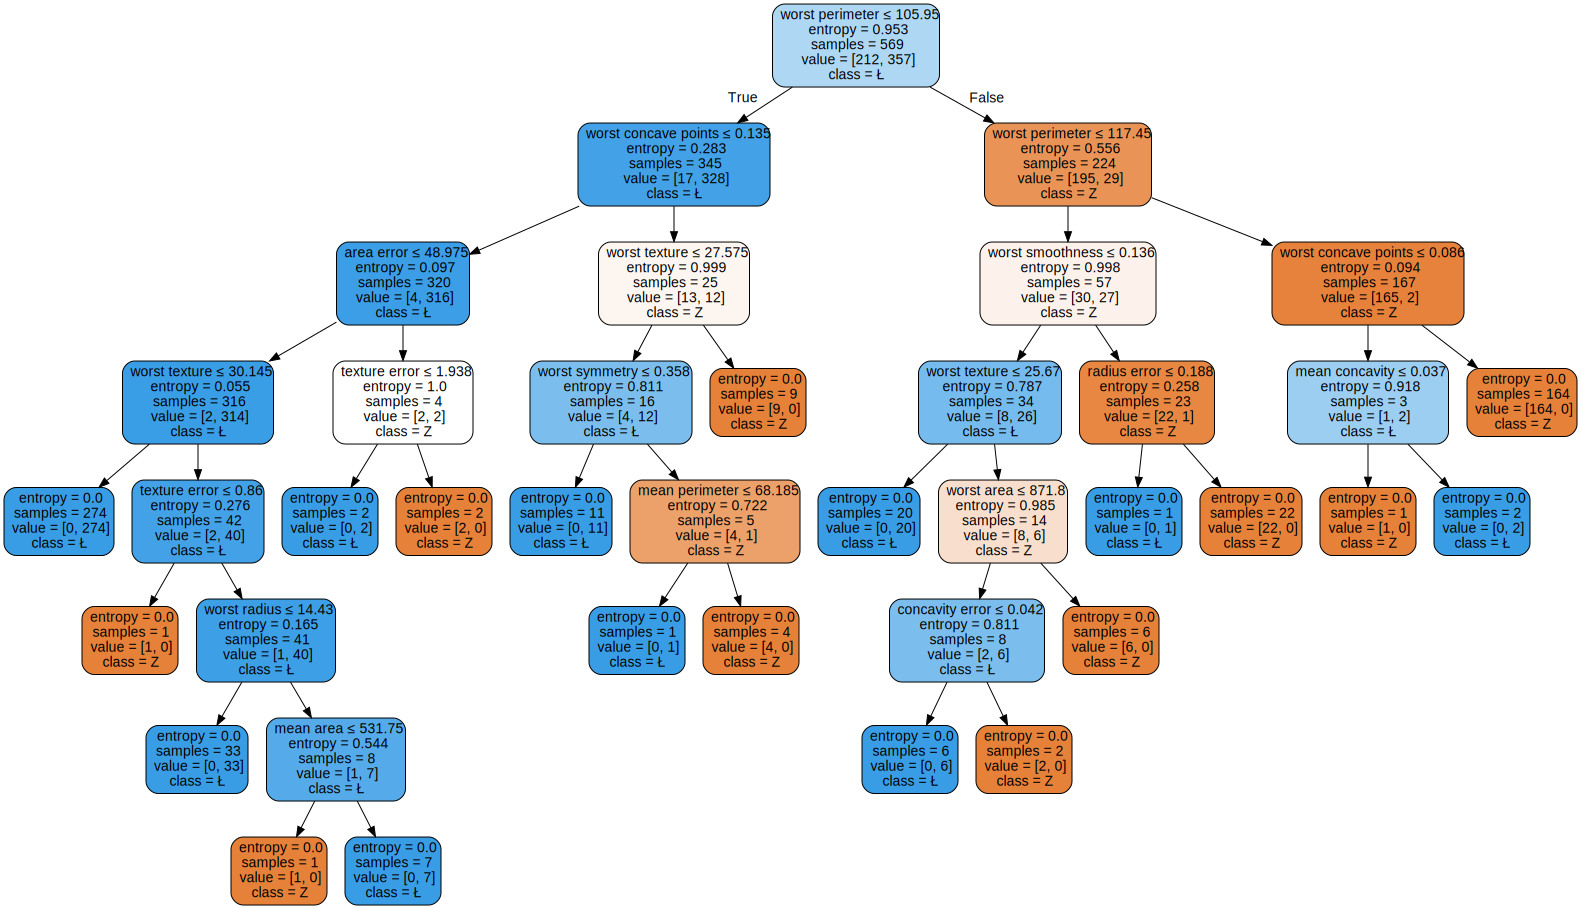

In [13]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

In [14]:
drzewo.score(X = X, y = y)

1.0

# Podział na zbiory train i test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y.value_counts(normalize = True)

Ł    0.627417
Z    0.372583
Name: klasa, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Ł    0.646154
Z    0.353846
Name: klasa, dtype: float64
Ł    0.552632
Z    0.447368
Name: klasa, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)  

In [20]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Ł    0.626374
Z    0.373626
Name: klasa, dtype: float64
Ł    0.631579
Z    0.368421
Name: klasa, dtype: float64


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [22]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
908194,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
871642,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
8812818,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
89143601,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [23]:
y_train.head()

922577      Ł
908194      Z
871642      Ł
8812818     Ł
89143601    Ł
Name: klasa, dtype: object

In [24]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
88649001,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050
90769601,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
91504,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830
9010872,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115


In [25]:
y_test.head()

88649001    Z
90769601    Ł
91504       Z
9010872     Ł
926424      Z
Name: klasa, dtype: object

In [26]:
X_train.to_csv("../output/X_train.csv", index_label = "index")
y_train.to_csv("../output/y_train.csv", index_label = "index")
X_test.to_csv("../output/X_test.csv", index_label = "index")
y_test.to_csv("../output/y_test.csv", index_label = "index")

# Użycie zbiorów train i test

In [27]:
drzewo.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

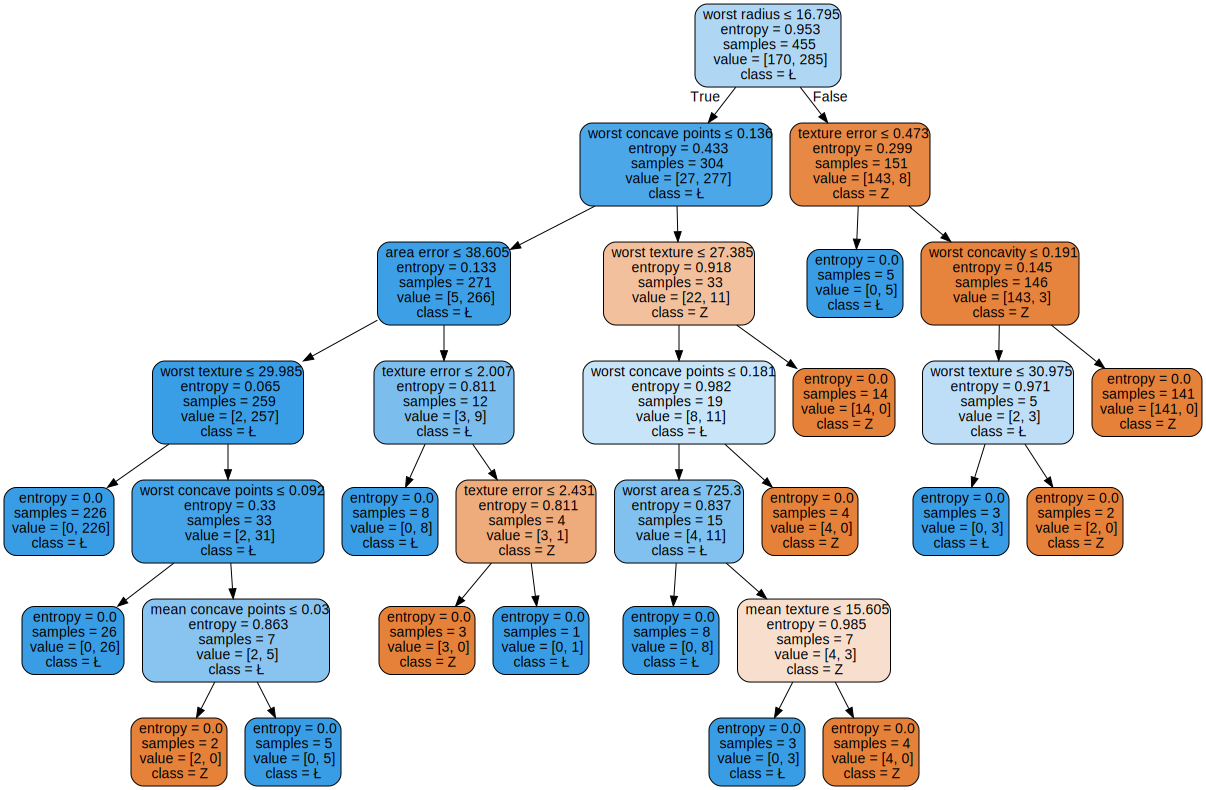

In [28]:
dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

In [29]:
predykcja = drzewo.predict(X = X_test)

In [30]:
predykcja

array(['Z', 'Ł', 'Z', 'Ł', 'Z', 'Ł', 'Ł', 'Z', 'Z', 'Z', 'Ł', 'Z', 'Ł',
       'Z', 'Z', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Z', 'Z', 'Ł', 'Ł', 'Ł', 'Z',
       'Z', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Z', 'Z', 'Ł', 'Z', 'Ł',
       'Z', 'Ł', 'Ł', 'Ł', 'Z', 'Z', 'Z', 'Ł', 'Ł', 'Z', 'Z', 'Ł', 'Z',
       'Ł', 'Z', 'Ł', 'Ł', 'Ł', 'Z', 'Z', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Z',
       'Ł', 'Z', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Z', 'Z', 'Z', 'Z', 'Ł',
       'Ł', 'Ł', 'Ł', 'Ł', 'Z', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł', 'Ł',
       'Ł', 'Z', 'Z', 'Z', 'Ł', 'Z', 'Ł', 'Z', 'Ł', 'Z', 'Z', 'Z', 'Ł',
       'Z', 'Z', 'Ł', 'Z', 'Ł', 'Z', 'Z', 'Z', 'Z', 'Ł'], dtype=object)

In [31]:
wyniki = pd.DataFrame({"predykcja": predykcja, "prawda": y_test})

In [32]:
wyniki.head()

,predykcja,prawda
88649001,Z,Z
90769601,Ł,Ł
91504,Z,Z
9010872,Ł,Ł
926424,Z,Z


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_true = wyniki["prawda"], y_pred = wyniki["predykcja"])

array([[40,  2],
       [ 8, 64]])

In [35]:
import seaborn as sns

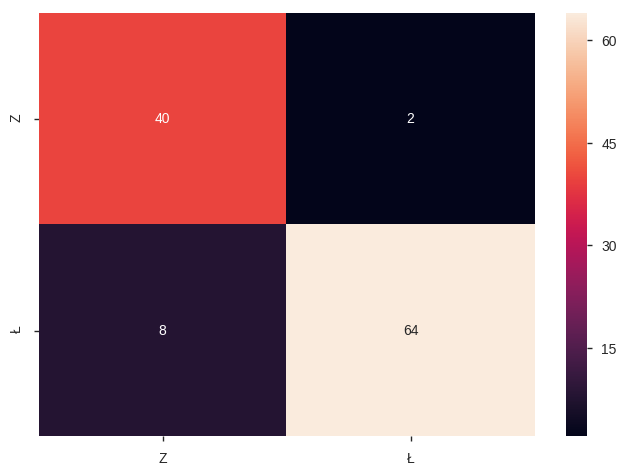

In [36]:
sns.heatmap(confusion_matrix(y_true = wyniki["prawda"], y_pred = wyniki["predykcja"]), 
            annot = True, fmt = "", xticklabels = ["Z", "Ł"], yticklabels = ["Z", "Ł"])

In [37]:
wyniki[(wyniki["prawda"] == "Ł") & (wyniki["predykcja"] == "Z")]

,predykcja,prawda
905189,Z,Ł
8911164,Z,Ł
89813,Z,Ł
901303,Z,Ł
921644,Z,Ł
8915,Z,Ł
866458,Z,Ł
88147202,Z,Ł


In [38]:
wyniki["prawdopod"] = abs(0.5 - drzewo.predict_proba(X_test)[:,1])

In [39]:
wyniki[wyniki["predykcja"] != wyniki["prawda"]].sort_values(by = ["prawdopod"])

,predykcja,prawda,prawdopod
905189,Z,Ł,0.5
8911164,Z,Ł,0.5
89813,Z,Ł,0.5
901303,Z,Ł,0.5
921644,Z,Ł,0.5
90291,Ł,Z,0.5
8915,Z,Ł,0.5
879523,Ł,Z,0.5
866458,Z,Ł,0.5
88147202,Z,Ł,0.5


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
drzewo.score(X = X_test, y = y_test), accuracy_score(y_true = wyniki["prawda"], y_pred = wyniki["predykcja"])

(0.9122807017543859, 0.9122807017543859)

# Powtarzalność budowy drzewa

Różne wyniki: https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn

# Lepsze hiperparametry?

In [42]:
rezultaty = pd.DataFrame()
rezultat = 0
hiperparametry = {}

for max_depth in range(1,21):
    drzewo = DecisionTreeClassifier(criterion = "entropy", max_depth = max_depth, random_state = 42)
    drzewo.fit(X = X_train, y = y_train)
    rezultat_testowy = drzewo.score(X = X_test, y = y_test)
    rezultat_treningowy = drzewo.score(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"max_depth": max_depth, 
                                            "rezultat_testowy": rezultat_testowy, 
                                            "rezultat_treningowy": rezultat_treningowy}, ignore_index = True)
    if rezultat_testowy > rezultat:
        print("Mamy lepszy rezultat: {}".format(rezultat_testowy))
        print("max_depth: {}".format(max_depth))
        rezultat = rezultat_testowy
        hiperparametry["max_depth"] = max_depth

Mamy lepszy rezultat: 0.9210526315789473
max_depth: 1
Mamy lepszy rezultat: 0.9473684210526315
max_depth: 3


In [43]:
hiperparametry

{'max_depth': 3}

In [44]:
rezultaty

,max_depth,rezultat_testowy,rezultat_treningowy
0,1.0,0.921053,0.923077
1,2.0,0.894737,0.958242
2,3.0,0.947368,0.967033
3,4.0,0.938596,0.984615
4,5.0,0.929825,0.991209
5,6.0,0.912281,1.000000
6,7.0,0.912281,1.000000
7,8.0,0.912281,1.000000
8,9.0,0.912281,1.000000
9,10.0,0.912281,1.000000


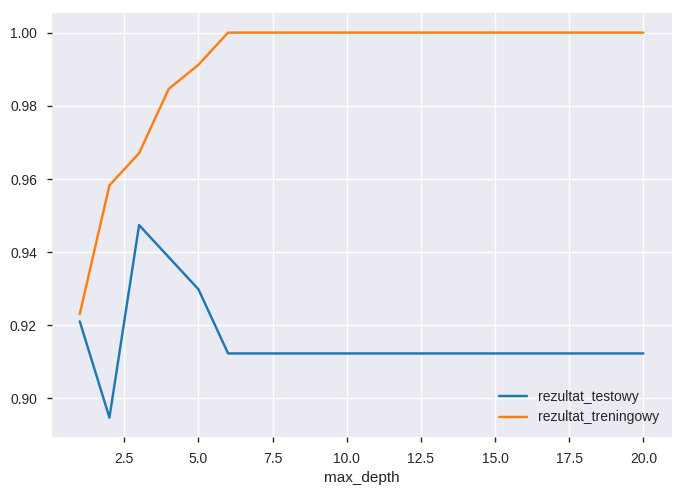

In [45]:
rezultaty.plot(x = "max_depth", grid = True)

In [46]:
drzewo = DecisionTreeClassifier(criterion = "entropy", max_depth = hiperparametry["max_depth"], random_state = 42)
drzewo.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

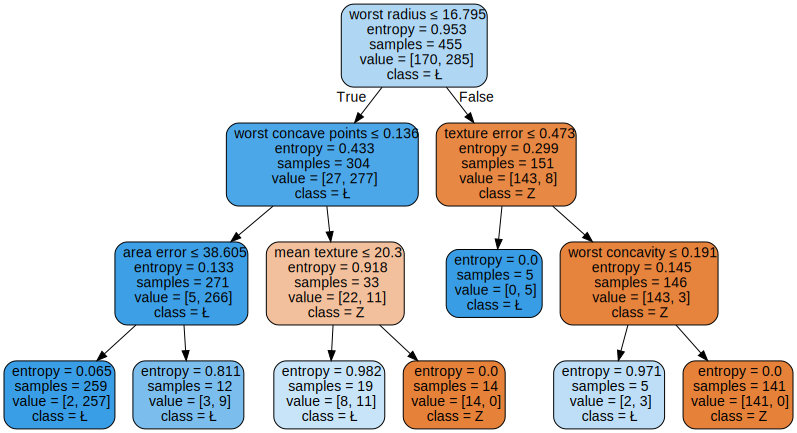

In [47]:
dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

# Dwa hiperparametry

In [51]:
rezultaty = pd.DataFrame()
rezultat = 0
hiperparametry = {}

for max_depth in range(1,21):
    for min_samples_leaf in range(1, 21):
        drzewo = DecisionTreeClassifier(criterion = "entropy", max_depth = max_depth, 
                                        min_samples_leaf = min_samples_leaf, random_state = 42)
        drzewo.fit(X = X_train, y = y_train)
        rezultat_testowy = drzewo.score(X = X_test, y = y_test)
        rezultat_treningowy = drzewo.score(X = X_train, y = y_train)
        rezultaty = rezultaty.append({"max_depth": max_depth,
                                      "min_samples_leaf": min_samples_leaf,
                                      "rezultat_testowy": rezultat_testowy, 
                                      "rezultat_treningowy": rezultat_treningowy}, ignore_index = True)
        if rezultat_testowy > rezultat:
            print("Mamy lepszy rezultat: {}".format(rezultat_testowy))
            print("max_depth: {}, min_samples_leaf: {}".format(max_depth, min_samples_leaf))
            rezultat = rezultat_testowy
            hiperparametry["max_depth"] = max_depth
            hiperparametry["min_samples_leaf"] = min_samples_leaf

Mamy lepszy rezultat: 0.9210526315789473
max_depth: 1, min_samples_leaf: 1
Mamy lepszy rezultat: 0.9473684210526315
max_depth: 3, min_samples_leaf: 1
Mamy lepszy rezultat: 0.956140350877193
max_depth: 3, min_samples_leaf: 6


In [52]:
rezultaty

,max_depth,min_samples_leaf,rezultat_testowy,rezultat_treningowy
0,1.0,1.0,0.921053,0.923077
1,1.0,2.0,0.921053,0.923077
2,1.0,3.0,0.921053,0.923077
3,1.0,4.0,0.921053,0.923077
4,1.0,5.0,0.921053,0.923077
5,1.0,6.0,0.921053,0.923077
6,1.0,7.0,0.921053,0.923077
7,1.0,8.0,0.921053,0.923077
8,1.0,9.0,0.921053,0.923077
9,1.0,10.0,0.921053,0.923077


In [53]:
macierz = pd.pivot_table(rezultaty[["max_depth", "min_samples_leaf", "rezultat_testowy"]], index = ["max_depth", "min_samples_leaf"]).unstack()

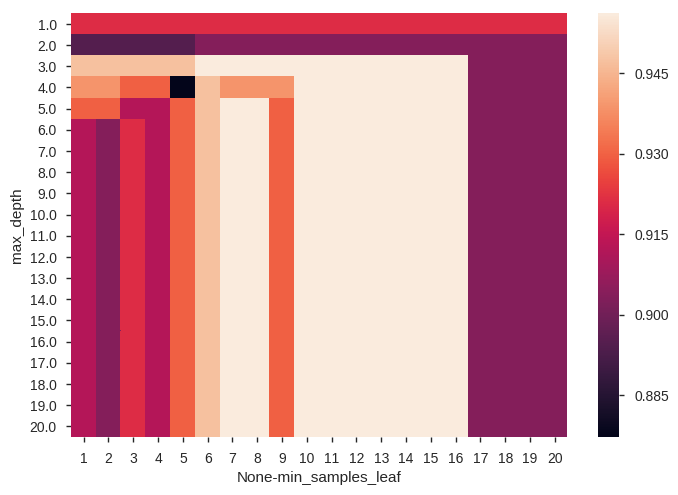

In [54]:
sns.heatmap(macierz, xticklabels=range(1,21))

In [55]:
hiperparametry

{'max_depth': 3, 'min_samples_leaf': 6}

# Cztery hiperparametry

In [56]:
len(range(1,21)) * len(range(1, 21)) * len(range(2,21)) * len(["entropy", "gini"])

15200

In [57]:
rezultaty = pd.DataFrame()
rezultat = 0
hiperparametry = {}

for max_depth in range(1,21):
    print("Testuję max_depth = {}".format(max_depth))
    for min_samples_leaf in range(1, 21):
        for min_samples_split in range(2, 21):
            for criterion in ["entropy", "gini"]:
                drzewo = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                                min_samples_leaf = min_samples_leaf,
                                                min_samples_split = min_samples_split, random_state = 42)
                drzewo.fit(X = X_train, y = y_train)
                rezultat_testowy = drzewo.score(X = X_test, y = y_test)
                rezultat_treningowy = drzewo.score(X = X_train, y = y_train)
                rezultaty = rezultaty.append({"max_depth": max_depth,
                                              "min_samples_leaf": min_samples_leaf,
                                              "rezultat_testowy": rezultat_testowy,
                                              "criterion": criterion,
                                              "min_samples_split": min_samples_split,
                                              "rezultat_treningowy": rezultat_treningowy}, ignore_index = True)
                if rezultat_testowy > rezultat:
                    print("Mamy lepszy rezultat: {}".format(rezultat_testowy))
                    print("max_depth: {}, min_samples_leaf: {}, "
                          "min_samples_split: {}, criterion: {}".format(max_depth, min_samples_leaf, min_samples_split,
                                                                        criterion))
                    rezultat = rezultat_testowy
                    hiperparametry["max_depth"] = max_depth
                    hiperparametry["min_samples_leaf"] = min_samples_leaf
                    hiperparametry["min_samples_split"] = min_samples_split
                    hiperparametry["criterion"] = criterion

Testuję max_depth = 1
Mamy lepszy rezultat: 0.9210526315789473
max_depth: 1, min_samples_leaf: 1, min_samples_split: 2, criterion: entropy
Testuję max_depth = 2
Testuję max_depth = 3
Mamy lepszy rezultat: 0.9473684210526315
max_depth: 3, min_samples_leaf: 1, min_samples_split: 2, criterion: entropy
Mamy lepszy rezultat: 0.956140350877193
max_depth: 3, min_samples_leaf: 6, min_samples_split: 2, criterion: entropy
Testuję max_depth = 4
Testuję max_depth = 5
Mamy lepszy rezultat: 0.9649122807017544
max_depth: 5, min_samples_leaf: 6, min_samples_split: 13, criterion: entropy
Testuję max_depth = 6
Testuję max_depth = 7
Testuję max_depth = 8
Testuję max_depth = 9
Testuję max_depth = 10
Testuję max_depth = 11
Testuję max_depth = 12
Testuję max_depth = 13
Testuję max_depth = 14
Testuję max_depth = 15
Testuję max_depth = 16
Testuję max_depth = 17
Testuję max_depth = 18
Testuję max_depth = 19
Testuję max_depth = 20


In [58]:
hiperparametry

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 13}

In [59]:
drzewo = DecisionTreeClassifier(criterion = "entropy", max_depth = hiperparametry["max_depth"], 
                                random_state = 42, min_samples_leaf = hiperparametry["min_samples_leaf"],
                                min_samples_split = hiperparametry["min_samples_split"])
drzewo.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=13,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

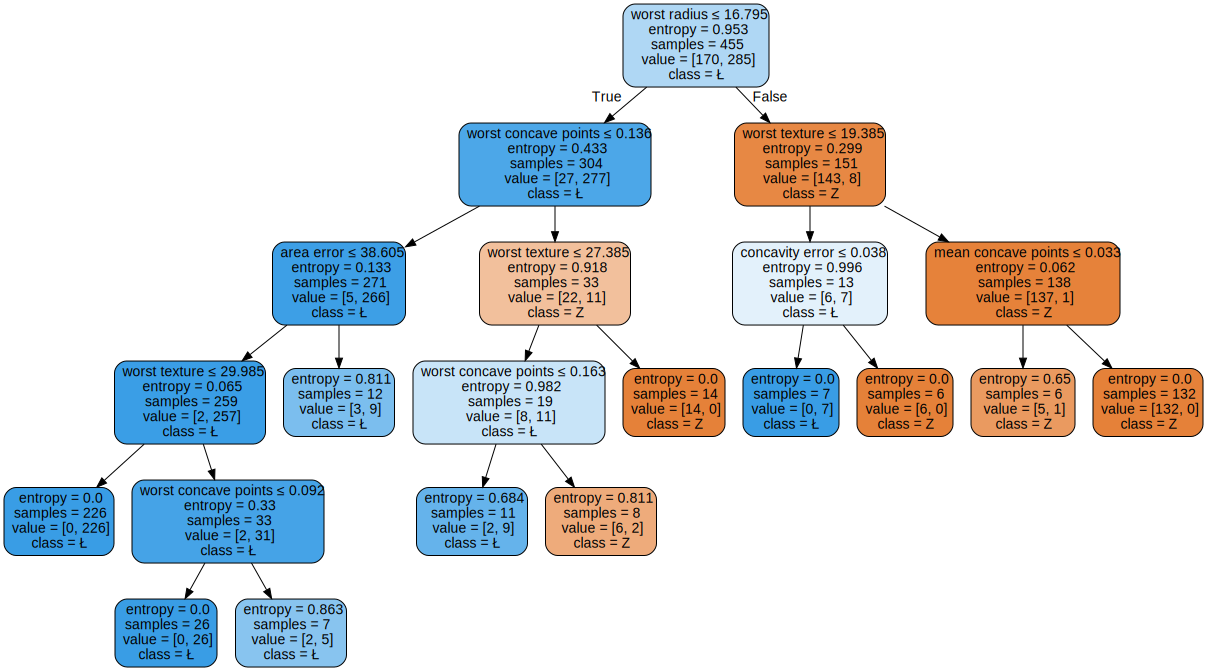

In [60]:
dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

In [61]:
predykcja = drzewo.predict(X = X_test)
wyniki = pd.DataFrame({"predykcja": predykcja, "prawda": y_test})
wyniki["prawdopod"] = abs(0.5 - drzewo.predict_proba(X_test)[:,1])
wyniki[wyniki["predykcja"] != wyniki["prawda"]].sort_values(by = ["prawdopod"])

,predykcja,prawda,prawdopod
90291,Ł,Z,0.214286
859983,Ł,Z,0.318182
9010872,Z,Ł,0.500000
905189,Z,Ł,0.500000


# GridSearch + CV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
estimator = DecisionTreeClassifier(random_state = 42)

In [116]:
param_grid = {"max_depth": range(2,9), "min_samples_leaf": range(3,10), "min_samples_split": range(10,17), 
              "criterion": ["entropy", "gini"]}

In [117]:
klasyfikator = GridSearchCV(estimator = estimator, param_grid = param_grid)

In [118]:
%%time
klasyfikator.fit(X = X_train, y = y_train)

CPU times: user 23.6 s, sys: 51.9 ms, total: 23.7 s
Wall time: 23.7 s


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 9), 'min_samples_leaf': range(3, 10), 'min_samples_split': range(10, 17), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
hiperparametry = klasyfikator.best_params_
hiperparametry

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

# Niestabilność

In [120]:
from sklearn.dummy import DummyClassifier

In [121]:
rezultaty = pd.DataFrame()
for ziarno_losowośći in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=ziarno_losowośći, stratify = y)
    drzewo = DecisionTreeClassifier(criterion = hiperparametry["criterion"], max_depth = hiperparametry["max_depth"], 
                                random_state = 42, min_samples_leaf = hiperparametry["min_samples_leaf"],
                                min_samples_split = hiperparametry["min_samples_split"])
    drzewo.fit(X = X_train, y = y_train)
    głupi = DummyClassifier(strategy="stratified", random_state=42)
    głupi.fit(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"dokładność_drzewo": drzewo.score(X = X_test, y = y_test), 
                                  "dokładność_głupi": głupi.score(X = X_test, y = y_test)}, ignore_index = True)

In [122]:
import matplotlib.pyplot as plt

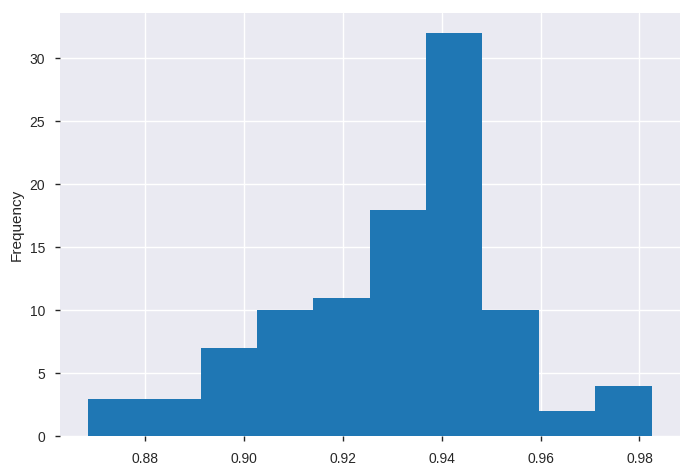

In [123]:
plt.figure()
rezultaty["dokładność_drzewo"].plot.hist()

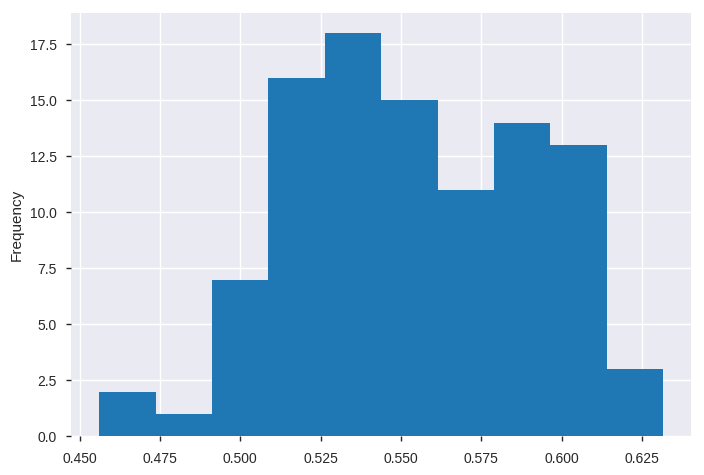

In [124]:
plt.figure()
rezultaty["dokładność_głupi"].plot.hist()

<Figure size 800x550 with 0 Axes>

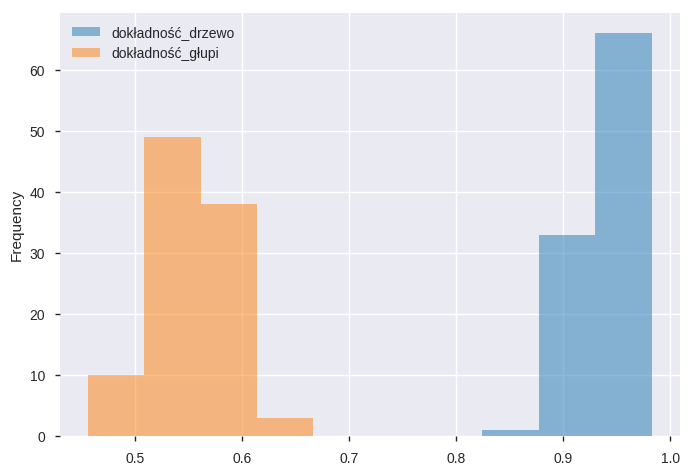

In [125]:
plt.figure()
rezultaty.plot.hist(alpha=0.5)

In [126]:
pandas_profiling.ProfileReport(rezultaty)

Number of variables,2
Number of observations,100
Total Missing (%),0.0%
Total size in memory,1.6 KiB
Average record size in memory,16.8 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0
